# [python] 使用scikit-learn工具計算文本TF-IDF值
### 參考：
https://blog.csdn.net/Eastmount/article/details/50323063

# TF-IDF计算
### Scikit-Learn中TF-IDF權重計算方法主要用到两個類別：
1. CountVectorizer
2. TfidfTransforme

# CountVectorizer

In [1]:
# coding:utf-8
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
    
#一個文本用一整個字串裝起來，一堆文本用list包起來
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
#将文本中的詞彙轉換成詞彙矩陣
vectorizer = CountVectorizer()
#計算個詞彙出現的次數
X = vectorizer.fit_transform(corpus)
#獲取詞袋中所有文本關鍵詞
word = vectorizer.get_feature_names()
# 全部斷詞的詞彙
print(word)
#查看詞彙出現次數結果（TF）
print(X.toarray())
pd.DataFrame(X.toarray(), columns=word)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,2,1,0,1
2,1,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,1,0,1


# TfidfTransformer

In [2]:
# coding:utf-8
from sklearn.feature_extraction.text import CountVectorizer
 
#一個文本用一整個字串裝起來，一堆文本用list包起來
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
#将文本中的詞彙轉換成詞彙矩陣
vectorizer = CountVectorizer()
#計算個詞彙出現的次數
X = vectorizer.fit_transform(corpus)
#獲取詞袋中所有文本關鍵詞
word = vectorizer.get_feature_names()
# 全部斷詞的詞彙
print(word)
#查看詞彙出現次數結果（TF）
print(X.toarray())
print("*"*100)

# Tfidf 套件
from sklearn.feature_extraction.text import TfidfTransformer
 
#Tfidf類別
transformer = TfidfTransformer()
#將詞彙矩陣X統計成TF-IDF值
tfidf = transformer.fit_transform(X)
#查看tfidf的數據 tfidf[i][j]表示i类文本中的tf-idf权重
print(tfidf.toarray())
pd.DataFrame(tfidf.toarray(), columns=word)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
****************************************************************************************************
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


,and,document,first,is,one,second,the,third,this
0,0.000000,0.438777,0.541977,0.438777,0.000000,0.000000,0.358729,0.000000,0.438777
1,0.000000,0.272301,0.000000,0.272301,0.000000,0.853226,0.222624,0.000000,0.272301
2,0.552805,0.000000,0.000000,0.000000,0.552805,0.000000,0.288477,0.552805,0.000000
3,0.000000,0.438777,0.541977,0.438777,0.000000,0.000000,0.358729,0.000000,0.438777


# 分析新聞範例

In [3]:
import jieba
import os
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [4]:
# 先讀取新聞存在路徑
News_DB_path = "./NewsDB/chinatimes"
#　News_seg_list　要裝讀到的所有新聞
News_seg_list = []
for news_file in os.listdir(News_DB_path):
    # 一個新聞完整的存取路徑
    news_file_path = os.path.join(News_DB_path, news_file)
    with open(news_file_path, "r") as News_reader:
        # 讀取完整新聞
        News_txt = News_reader.read()
        # 將新聞斷詞，並用空格隔開
        News_seg = " ".join(jieba.cut(News_txt, cut_all=False, HMM=True))
        News_seg_list.append(News_seg)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.820 seconds.
Prefix dict has been built succesfully.


In [5]:
#　詞彙矩陣類別
vectorizer = CountVectorizer()
#　計算新聞集的詞頻
News_tf = vectorizer.fit_transform(News_seg_list)
#　取得全部新聞集的關鍵詞
Key_words = vectorizer.get_feature_names()
# 查看詞彙矩陣維度
print(News_tf.toarray().shape)

(93, 7737)


In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
#　Tfidf類別
transformer = TfidfTransformer()
#　将詞彙矩陣　News_tf　统计成TF-IDF值
News_tfidf = transformer.fit_transform(News_tf)
#查看tfidf的數據 tfidf[i][j]表示i类文本中的tf-idf权重
News_tfidf_values = News_tfidf.toarray()
News_tfidf_df = pd.DataFrame(News_tfidf_values, columns=Key_words)

# 一些統計數據

In [7]:
News_tfidf_df_sum = News_tfidf_df.sum()

# TFIDF分佈狀況

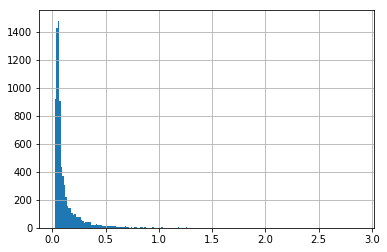

In [14]:
import matplotlib.pyplot as plt
News_tfidf_df_sum.hist(bins = 200)
plt.show()

# 查看 TfIdf　排名前幾名的關鍵字

In [9]:
News_tfidf_df_top_ranks = News_tfidf_df_sum[News_tfidf_df_sum >= News_tfidf_df_sum.max()*0.4]

### 中文字判斷：
* 用python3判断一个字符串是不是中文组成的
* https://segmentfault.com/q/1010000007898150/a-1020000007898238

In [10]:
News_top_ranks_keyWords = list(filter(lambda x:'\u4e00' <= x <= '\u9fa5', News_tfidf_df_top_ranks.index))
News_top_ranks_keyWords

['上市',
 '主要',
 '今年',
 '企業',
 '億元',
 '公司',
 '台灣',
 '商品',
 '工商',
 '市場',
 '成長',
 '投資',
 '指數',
 '智慧',
 '暫報',
 '美元',
 '美國',
 '股票',
 '蘋果',
 '表示',
 '金融',
 '顯示']

# 應用 - 找尋財經關鍵新聞

In [13]:
Key_News_table = News_tfidf_df[News_top_ranks_keyWords]
Key_News_table.index = os.listdir(News_DB_path)
Key_News_table.head(10)

,上市,主要,今年,企業,億元,公司,台灣,商品,工商,市場,...,指數,智慧,暫報,美元,美國,股票,蘋果,表示,金融,顯示
2018_08_24_15_30 豪雨強風彰化4423戶大停電 台電拚命搶修中.txt,0.00000,0.030228,0.000000,0.000000,0.000000,0.027310,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.023094,0.000000,0.000000
2018_08_24_22_58 高盛資料 共同基金減持尖牙股.txt,0.00000,0.000000,0.072080,0.000000,0.000000,0.000000,0.000000,0.000000,0.023827,0.032973,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
"2018_08_26_20_08 券商看本周指數區間10,800-11,000點.txt",0.00000,0.032615,0.033122,0.000000,0.075836,0.000000,0.000000,0.000000,0.021897,0.000000,...,0.082041,0.0000,0.00000,0.182862,0.0,0.0,0.0,0.000000,0.083809,0.000000
2018_08_24_23_28 防洪別想跑 明年２公頃開發案需提低衝擊計畫.txt,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.021777,0.000000,0.000000
2018_08_24_13_27 零售區塊鏈美商A7 CORE改變策略 取消大眾募資計畫.txt,0.00000,0.000000,0.024094,0.028106,0.000000,0.128612,0.079812,0.000000,0.000000,0.022043,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.054377,0.000000,0.000000
2018_08_27_15_07 智慧應用服務AI Clerk 輕鬆購物不設限.txt,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017047,0.128796,0.010207,0.028250,...,0.000000,0.1543,0.00000,0.017047,0.0,0.0,0.0,0.011614,0.000000,0.000000
2018_08_24_16_41 高雄取得前瞻計畫7億元 整修小港國際機場聯外道路.txt,0.00000,0.025928,0.000000,0.000000,0.060286,0.000000,0.000000,0.000000,0.017407,0.000000,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.019808,0.000000,0.000000
2018_08_27_10_42 低薪、高房價 年輕人購屋貸款者佔比不到2成.txt,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031345,0.000000,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.059983,0.055306
2018_08_27_09_17 雙王與國巨開高 台股開漲37.82點報10847.17.txt,0.04347,0.000000,0.000000,0.000000,0.037598,0.000000,0.000000,0.000000,0.021713,0.030047,...,0.000000,0.0000,0.30157,0.000000,0.0,0.0,0.0,0.000000,0.041551,0.038311
2018_08_26_00_01 5千張預售票90秒完售！租車行老闆如何「踩」紅舊山線？.txt,0.00000,0.000000,0.000000,0.021681,0.000000,0.016535,0.020523,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


# 找出前幾名財經關鍵新聞

In [20]:
Key_News_table[Key_News_table.sum(1) > Key_News_table.sum(1).quantile(.75)]

,上市,主要,今年,企業,億元,公司,台灣,商品,工商,市場,...,指數,智慧,暫報,美元,美國,股票,蘋果,表示,金融,顯示
"2018_08_26_20_08 券商看本周指數區間10,800-11,000點.txt",0.000000,0.032615,0.033122,0.000000,0.075836,0.000000,0.000000,0.000000,0.021897,0.000000,...,0.082041,0.000000,0.000000,0.182862,0.000000,0.000000,0.000000,0.000000,0.083809,0.000000
2018_08_27_13_00 《匯市》新台幣升值3.9分 報30.744.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.037403,0.000000,0.000000,0.027795,0.000000,...,0.000000,0.000000,0.540464,0.324955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018_08_24_16_59 證交所審議通過鋐寶科技上市案.txt,0.318222,0.033821,0.000000,0.000000,0.157278,0.091668,0.000000,0.000000,0.022707,0.031423,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.090921,0.000000,0.025838,0.000000,0.000000
2018_08_27_11_22 市場波動加大 特別股ETF雙優勢突圍.txt,0.000000,0.038206,0.038800,0.045260,0.000000,0.034518,0.000000,0.080920,0.012825,0.053246,...,0.144158,0.000000,0.000000,0.000000,0.199880,0.051355,0.000000,0.014594,0.024544,0.045260
2018_08_24_15_23 美國聯邦貸款項目投資移民.txt,0.027261,0.000000,0.000000,0.048052,0.000000,0.054971,0.000000,0.000000,0.000000,0.018844,...,0.000000,0.000000,0.000000,0.000000,0.282945,0.000000,0.000000,0.015494,0.000000,0.000000
2018_08_27_08_35 《盤前》量縮有利法人作帳 台股趨堅.txt,0.025719,0.028701,0.068010,0.011333,0.100102,0.077792,0.010728,0.040526,0.006423,0.088887,...,0.024065,0.027743,0.000000,0.042911,0.055612,0.025719,0.015176,0.029236,0.049167,0.034000
2018_08_27_13_01 華映參加2018智慧自動化展.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033728,0.000000,0.020194,0.000000,...,0.000000,0.436126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106897
2018_08_24_19_48 櫃買中心今日董事會通過誠泰工業等5件股票上櫃案.txt,0.000000,0.127089,0.000000,0.030111,0.000000,0.160751,0.000000,0.071780,0.017065,0.023616,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.102497,0.000000,0.019419,0.065315,0.000000
2018_08_24_13_57 《盤後》MLCC揚眉吐氣 台股收10809力守10800.txt,0.021705,0.000000,0.016399,0.000000,0.056320,0.014589,0.054322,0.000000,0.010842,0.120026,...,0.101548,0.000000,0.000000,0.036215,0.018773,0.151938,0.000000,0.012337,0.000000,0.019130
2018_08_24_23_27 全國電總經理林政勳：明年跨足網購 今年全年營收拼超越去年.txt,0.000000,0.059347,0.080360,0.000000,0.091995,0.053619,0.000000,0.335195,0.013282,0.018380,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045340,0.000000,0.000000
